In [1]:
import numpy as np
import matplotlib.pyplot as plt

В классическом машинном обучении матрица признаков  - это матрица, в которой одна строка есть признаки для одного объекта. Мы сегодня будем рассматривать немного по другому, так как рассматривают обычно в статистике (транспонированную версию этой матрицы) - каждый объект это столбец

In [2]:
#Пространство признаков для объекта (стаж репетиторы)
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

Как думаете, для чего тут есть строка состоящая из единиц?

In [3]:
X.T

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [4]:
# Целевая переменная (средний балл ЕГЭ)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

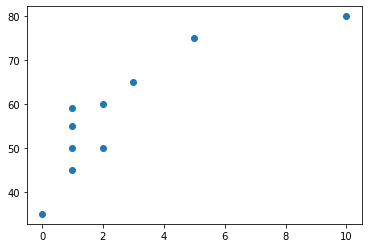

In [5]:
plt.scatter(X[1,:], y)
# y = a*x + b

In [ ]:
y = a*X[1]+b*X[0]

Уравнение прямой для одного признака будет задаваться уравнением y = a*x + b. За что отвечает a, за что отвечает b?

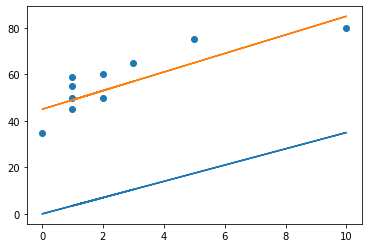

In [6]:
plt.scatter(X[1,:], y)
plt.plot(X[1, :], 3.5*X[1, :] )
plt.plot(X[1, :], 4*X[1, :] + 45)

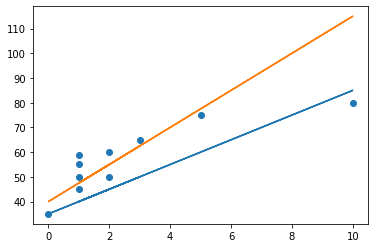

In [7]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*X[0] + X[1]*5)
plt.plot(X[1], 40*X[0] + X[1]*7.5)

# mse - mean squared error
# mae - mean absolute error

In [8]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [9]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [10]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

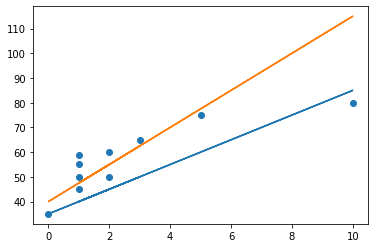

In [11]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1)
plt.plot(X[1], y_pred2)

In [12]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

In [13]:
err1, err2

(9.4, -2.1)

In [14]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [15]:
mae_1, mae_2

(10.4, 7.9)

In [16]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [17]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [18]:
X.shape

(2, 10)

In [19]:
X.T.shape

(10, 2)

In [20]:
X.dot(X.T)

array([[ 10,  26],
       [ 26, 146]])

In [21]:
W = np.linalg.inv(X @ X.T) @ X @ y
W

array([47.23214286,  3.91071429])

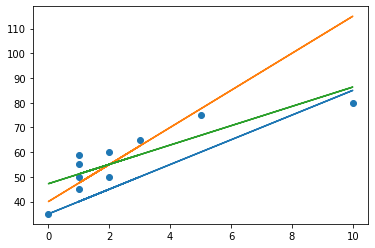

In [22]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [23]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [24]:
calc_mse(y, y_pred1)

143.6

In [25]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [26]:
calc_mae(y, y_pred1)

10.4

In [27]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [28]:
calc_mse(y, y_pred3)

45.937499999999986

In [29]:
calc_mae(y, y_pred3)

6.182142857142857

Градиентный спуск

In [35]:
np.mean(y_pred - y)**2
np.mean(w*x - y)**2
np.sum(w*x - y)**2 / n
1/n * np.sum((w*x - y)**2)
(w*x - y)**2

2*z'

2*x*(w*x - y) 
2*x*(w*x - y)

NameError: name 'w' is not defined

In [30]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [31]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [32]:
W[0] - g

47.23214306049999

1. Подберите скорость обучения (alpha) и количество итераций:

In [33]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.01)

In [34]:
for i in range(2001):
    y_pred = np.dot(W, X)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    err = calc_mse(y, y_pred)
    if i % 100 == 0:
        print(i, W, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219886
1100 [47.23169965  3.91079613] 45.937500107834126
1200 [47.23198702  3.91074306] 45.93750001333172
1300 [47.23208806  3.9107244 ] 45.93750000164824
1400 [47.23212359  3.91071784] 45.93750000020376
1500 [47.23213608  3.91071554] 45.93750000002521
1600 [47.23214048  3.91071473] 45.93750000000313
1700 [47.23214202  3.91071444] 45.937500000000384
1800 [47.23214256  3.91071434] 45.93750000000005
1900 [47.23214275  3.9107143 ] 45.93750000000001
2000 [47.23214282  3.91071429] 45.9374999999999

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [35]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.01)

In [36]:
for i in range(2001):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219886
1100 [47.23169965  3.91079613] 45.937500107834126
1200 [47.23198702  3.91074306] 45.93750001333172
1300 [47.23208806  3.9107244 ] 45.93750000164824
1400 [47.23212359  3.91071784] 45.93750000020376
1500 [47.23213608  3.91071554] 45.93750000002521
1600 [47.23214048  3.91071473] 45.93750000000313
1700 [47.23214202  3.91071444] 45.937500000000384
1800 [47.23214256  3.91071434] 45.93750000000005
1900 [47.23214275  3.9107143 ] 45.93750000000001
2000 [47.23214282  3.91071429] 45.9374999999999

colab.research.google.com

tlg: @emiliyam

In [45]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.01)

In [46]:
eps = 1e-8
y_pred = np.dot(W, X)
err = calc_mse(y, y_pred)
W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)))
dist = err
for i in range(2000000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)))
    if abs(dist - err) < eps:
        print(i, W, err)
        break
    else:
        dist = err

1029 [47.23122165  3.91088439] 45.93750046587032
